----

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Vajar los archivos correctamente para poder leer la informacion y poder usarla correctamente.

In [3]:
import pandas as pd

In [4]:
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

In [5]:
products = pd.read_csv('/datasets/products.csv', sep=';')

In [6]:
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')

In [7]:
departments = pd.read_csv('/datasets/departments.csv', sep=';')

In [8]:
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [9]:
print(instacart_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


## Conclusiones

Bajar el dataset es lo mas facil, me dio la informacion que necesitaba para poder trabajar y hacer todo el projecto como debe de ser.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Verificar y cerregir los datos, identificar valores ausentes asi como tambien eliminar duplicados.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [10]:
instacart_orders.duplicated().sum()


15

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Si. Los dias que tienen desde que las ordenaron.

In [11]:
wednesday_2am = instacart_orders[(instacart_orders['order_dow'] == 3) &
                                 (instacart_orders['order_hour_of_day'] == 2)]
print(f"Pedidos del miercoles a las 2:00 a.m.: {len(wednesday_2am)}")
wednesday_2am.head()


Pedidos del miercoles a las 2:00 a.m.: 121


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0


¿Qué sugiere este resultado?
Que tenemos que limpiar los duplicados para que no alla ningun error.

In [12]:
instacart_orders = instacart_orders.drop_duplicates()


In [13]:
instacart_orders.duplicated().sum()


0

In [14]:
instacart_orders['order_id'].duplicated().sum()


0

Limpieza de duplicados para poder usar la informacion correctamente.

### `products` data frame

In [15]:
products.duplicated().sum()


0

In [16]:
products['product_id'].duplicated().sum()

0

In [17]:
products['product_name'].str.upper().duplicated().sum()


1361

In [18]:
products[products['product_name'].notna()]['product_name'].str.upper().duplicated().sum()


104

Encontre duplicados, pude desaserme de ellos para seguir trabajando en el proyecto.

### `departments` data frame

In [19]:
departments.duplicated().sum()

0

In [20]:
departments['department_id'].duplicated().sum()

0

Me asegure que en este departamento todo estuviera bien para poder seguir limpiando mi data.

### `aisles` data frame

In [21]:
aisles.duplicated().sum()

0

In [22]:
aisles['aisle_id'].duplicated().sum()

0

No tuve ningun probrema y pude seguir adelante.

### `order_products` data frame

In [23]:
order_products.duplicated().sum()


0

In [24]:
order_products[['order_id', 'product_id']].duplicated().sum()


0

order_products tampoco encontre duplicados ya que se limpio desde antes.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [25]:
products['product_id'].isna().sum()

0

Describe brevemente cuáles son tus hallazgos.

In [26]:
productos_sin_nombres = products[products['product_name'].isna()]


Describe brevemente cuáles son tus hallazgos.

In [27]:
productos_sin_nombres['aisle_id'].unique()


array([100])

Descubri productos sin nombre.

In [28]:
aisles[aisles['aisle_id'] == 100]


,aisle_id,aisle
99,100,missing


Tuve valores ausentes a los cuales pude arreglar.

In [29]:
products['product_name'] = products['product_name'].fillna('Unknown')


Los valores ausentes que no tenian nombre se les puso 'unknown'

### `orders` data frame

In [30]:
instacart_orders['days_since_prior_order'].isna().sum()

28817

In [31]:
orders = instacart_orders

pedidos_problematicos = orders[(orders['days_since_prior_order'].isna()) &
                               (orders['order_number'] != 1)]
print(f"Pedidos problematicos: {len(pedidos_problematicos)}")


Pedidos problematicos: 0


descubri que avia ordenes que tenian mucho que no se pedia pero ningun pedido problematico.

### `order_products` data frame

In [32]:
order_products['add_to_cart_order'].isna()

0          False
1          False
2          False
3          False
4          False
           ...  
4545002    False
4545003    False
4545004    False
4545005    False
4545006    False
Name: add_to_cart_order, Length: 4545007, dtype: bool

In [33]:
print("Minimo:", order_products['add_to_cart_order'].min())
print("Maximo:", order_products['add_to_cart_order'].max())

Minimo: 1.0
Maximo: 64.0


Se dio a conocer que los clientes suelen reordenar productos que mas usan.

In [34]:
filas_con_ausentes = order_products['add_to_cart_order'].isna()
pedidos_con_problemas = order_products[filas_con_ausentes]['order_id']
ids_problematicos = pedidos_con_problemas.unique()


In [36]:


import pandas as pd

productos_con_na = order_products[order_products['order_id'].isin(ids_problematicos)]

productos_por_pedido_problematico = productos_con_na.groupby('order_id')['product_id'].count()

min_productos = productos_por_pedido_problematico.min()
max_productos = productos_por_pedido_problematico.max()

print(f"El numero minimo de productos en pedidos con valores ausentes es: {min_productos}")
print(f"El numero maximo de productod en pedidos con valores ausentes es: {max_productos}")


El numero minimo de productos en pedidos con valores ausentes es: 65
El numero maximo de productod en pedidos con valores ausentes es: 127


Es importante checar la informacion para ver si no hay valores ausentes en los pedidos.

In [37]:

order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)


Se reemplazaron los valores ausentes en esta columna. Como tambien se convirtienron las columnas a numeros enteros.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [38]:
print("Columnas en orders:")
print(orders.columns.tolist())

Columnas en orders:
['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']


In [39]:
print("Primeros 10 valores de order_hour_of_day")
print(orders['order_hour_of_day'].head(10))

print("\nPrimeros 10 valores de order_dow:")
print(orders['order_dow'].head(10))

Primeros 10 valores de order_hour_of_day
0    13
1    12
2    19
3    20
4    12
5    11
6     8
7    18
8    15
9     8
Name: order_hour_of_day, dtype: int64

Primeros 10 valores de order_dow:
0    6
1    5
2    5
3    0
4    4
5    0
6    3
7    0
8    5
9    4
Name: order_dow, dtype: int64


Se verifico que todos los datos tuvieran sentido.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

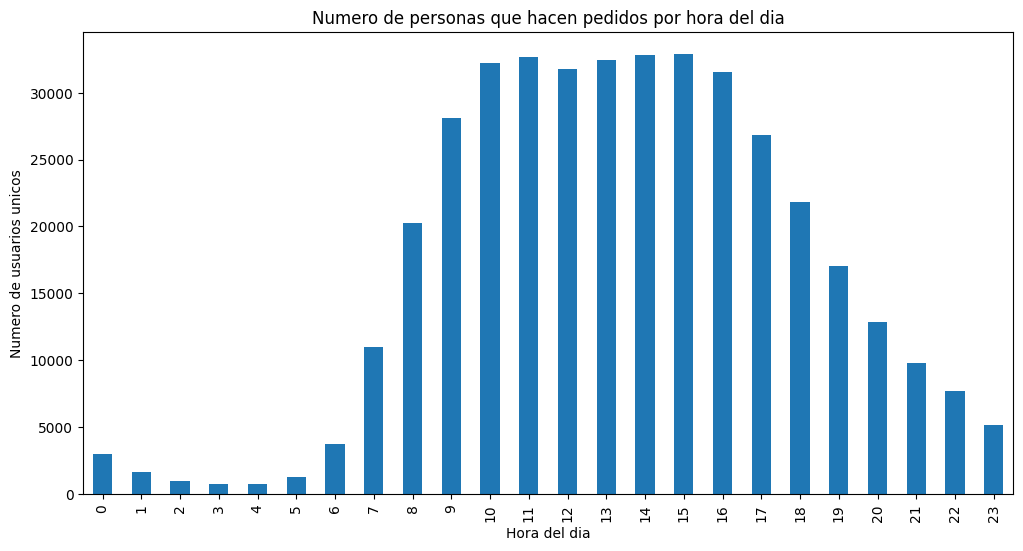

In [40]:
orders.groupby('order_hour_of_day')['user_id'].nunique()

import matplotlib.pyplot as plt
users_per_hour = orders.groupby('order_hour_of_day')['user_id'].nunique()

users_per_hour.plot(kind='bar', figsize=(12, 6))
plt.title('Numero de personas que hacen pedidos por hora del dia')
plt.xlabel('Hora del dia')
plt.ylabel('Numero de usuarios unicos')
plt.show()

Mas de 30,000 mil personas hacen ordenes.

### [A3] ¿Qué día de la semana compran víveres las personas?

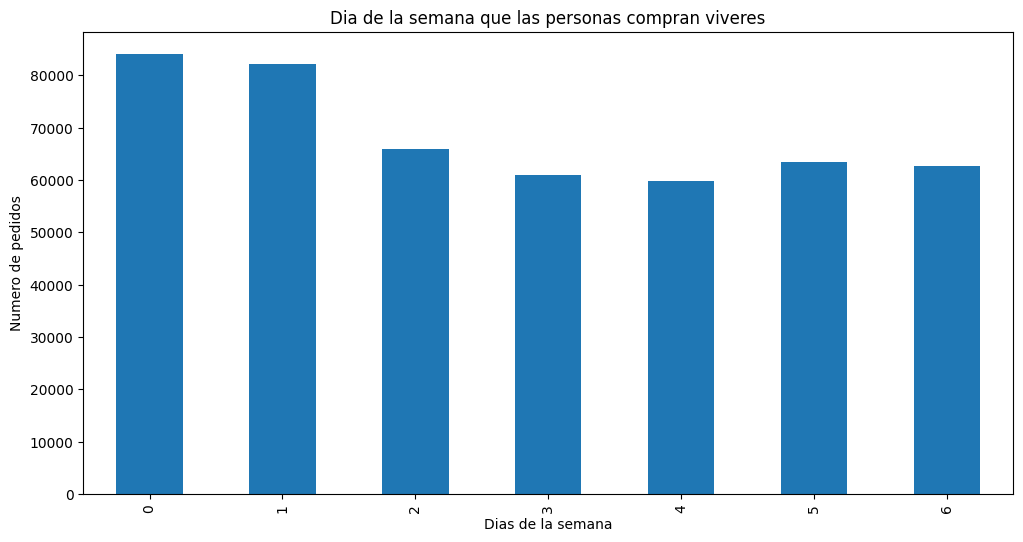

In [41]:
orders.groupby('order_dow')['order_number'].count()

import matplotlib.pyplot as plt
pedidos_por_dia = orders.groupby('order_dow')['order_number'].count()

pedidos_por_dia.plot(kind='bar', figsize=(12, 6))
plt.title("Dia de la semana que las personas compran viveres")
plt.xlabel('Dias de la semana')
plt.ylabel('Numero de pedidos')
plt.show()

Domingo y Lunes es cuando mas compran viveres.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

Informacion sobre days_since_prior_order:
count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


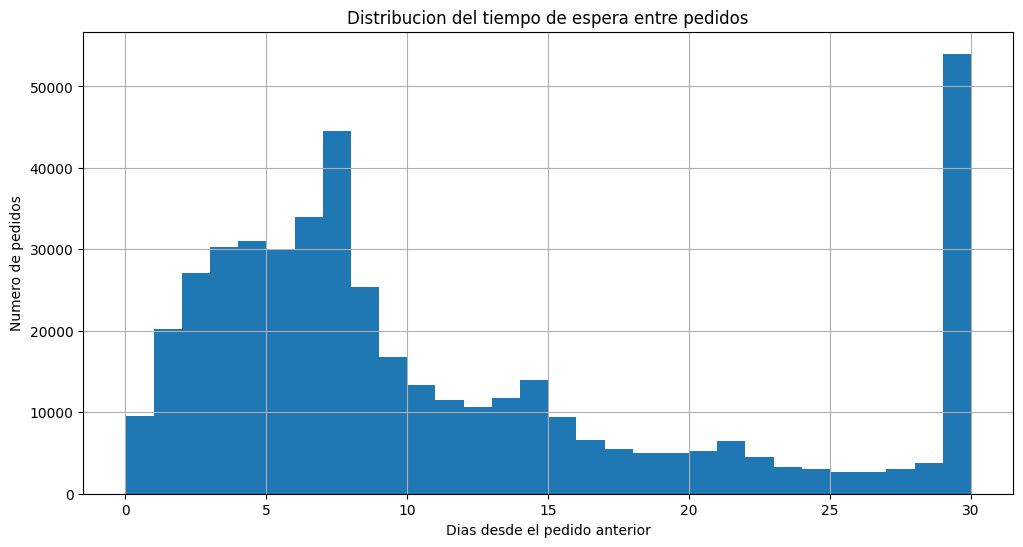

In [42]:
print("Informacion sobre days_since_prior_order:")
print(orders['days_since_prior_order'].describe())

orders['days_since_prior_order'].hist(bins=30, figsize=(12, 6))
plt.title('Distribucion del tiempo de espera entre pedidos')
plt.xlabel('Dias desde el pedido anterior')
plt.ylabel('Numero de pedidos')
plt.show()

En los primeros 7 dias hay mas pedidos que en los siguientes dias.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [43]:
pedidos_miercoles = orders[orders['order_dow'] == 3]

In [44]:
pedidos_sabado = orders[orders['order_dow'] == 6]

In [45]:
pedidos_miercoles.groupby('order_hour_of_day').size()
pedidos_sabado.groupby('order_hour_of_day').size()

order_hour_of_day
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
dtype: int64

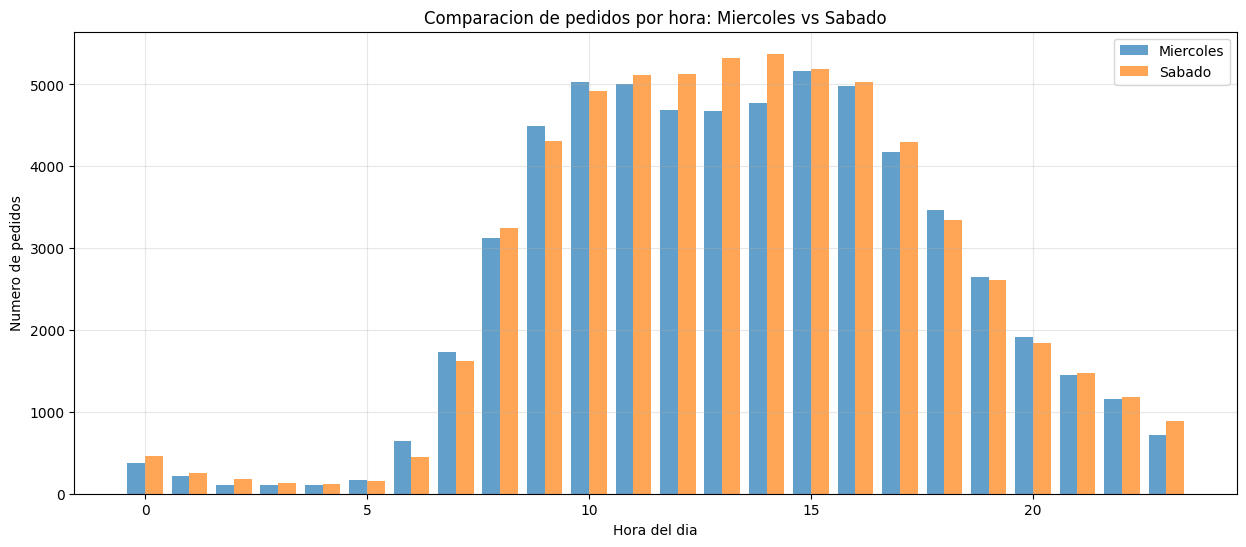

In [46]:
import matplotlib.pyplot as plt

miercoles_data = pedidos_miercoles.groupby('order_hour_of_day').size()
sabado_data = pedidos_sabado.groupby('order_hour_of_day').size()

plt.figure(figsize=(15, 6))
plt.bar(miercoles_data.index - 0.2, miercoles_data.values, width=0.4, label='Miercoles', alpha=0.7)
plt.bar(sabado_data.index + 0.2, sabado_data.values, width=0.4, label='Sabado', alpha=0.7)

plt.title('Comparacion de pedidos por hora: Miercoles vs Sabado')
plt.xlabel('Hora del dia')
plt.ylabel('Numero de pedidos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Los sabados tienden a ordenar mas pedidos que los miercoles.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [47]:
orders.groupby('user_id')['order_id'].count()

user_id
2         2
4         2
5         1
6         2
7         2
         ..
206203    1
206206    7
206207    5
206208    9
206209    2
Name: order_id, Length: 157437, dtype: int64

1     55357
2     36508
3     21547
4     13498
5      8777
6      6012
7      4240
8      3019
9      2152
10     1645
11     1308
12      947
13      703
14      512
15      437
16      263
17      184
18      121
19       85
20       52
22       23
21       22
23       19
24        3
25        1
26        1
28        1
Name: order_id, dtype: int64


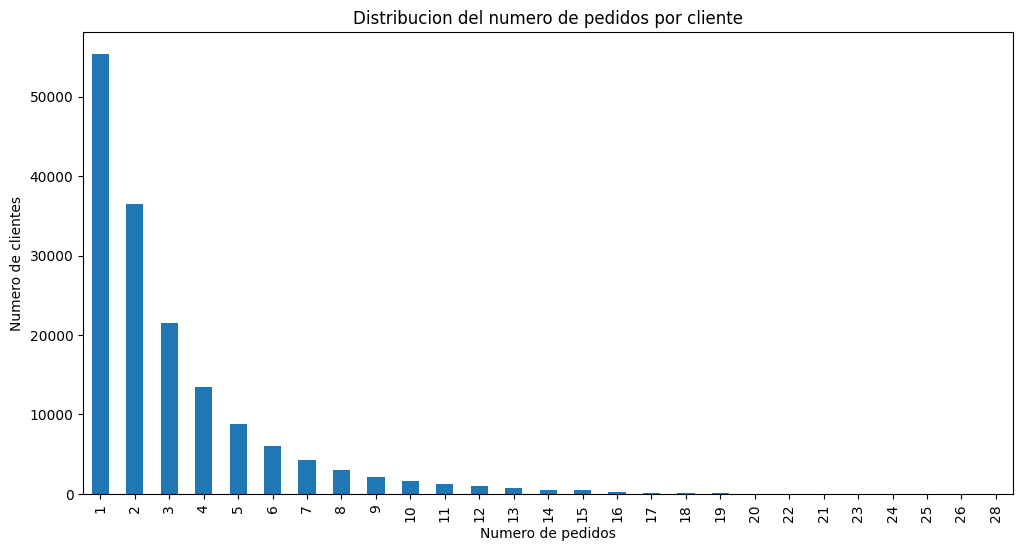

In [48]:
pedidos_por_cliente = orders.groupby('user_id')['order_id'].count()

distribucion = pedidos_por_cliente.value_counts()
print(distribucion)

import matplotlib.pyplot as plt

distribucion.plot(kind='bar', figsize=(12, 6))
plt.title('Distribucion del numero de pedidos por cliente')
plt.xlabel('Numero de pedidos')
plt.ylabel('Numero de clientes')
plt.show()

Hay mas pedidos en los primeros dias que en los demas.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [49]:
product_counts = order_products.groupby('product_id').size().reset_index(name='count')

In [50]:
top_products = product_counts.merge(products, on='product_id')

In [51]:
top_20_products = top_products.sort_values(by='count', ascending=False).head(20)
print(top_20_products[['product_id', 'product_name', 'count']])

       product_id              product_name  count
22808       24852                    Banana  66050
12025       13176    Bag of Organic Bananas  53297
19370       21137      Organic Strawberries  37039
20077       21903      Organic Baby Spinach  33971
43271       47209      Organic Hass Avocado  29773
43788       47766           Organic Avocado  24689
43663       47626               Large Lemon  21495
15364       16797              Strawberries  20018
24047       26209                     Limes  19690
25556       27845        Organic Whole Milk  19600
25666       27966       Organic Raspberries  19197
21025       22935      Organic Yellow Onion  15898
22908       24964            Organic Garlic  15292
41244       45007          Organic Zucchini  14584
35996       39275       Organic Blueberries  13879
45561       49683            Cucumber Kirby  13675
25889       28204        Organic Fuji Apple  12544
5375         5876             Organic Lemon  12232
7543         8277  Apple Honeyc

Se mostraron los productos mas populares y vendidos.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [52]:
productos_por_pedido = order_products.groupby('order_id').size()
print(productos_por_pedido.head())

order_id
4     13
9     15
11     5
19     3
20     8
dtype: int64


In [53]:
print(productos_por_pedido.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64


1     21847
2     26292
3     29046
4     31054
5     31923
6     31698
7     30822
8     28539
9     25742
10    23248
11    20406
12    18539
13    16497
14    14472
15    12696
16    11465
17    10002
18     8726
19     7612
20     6771
dtype: int64


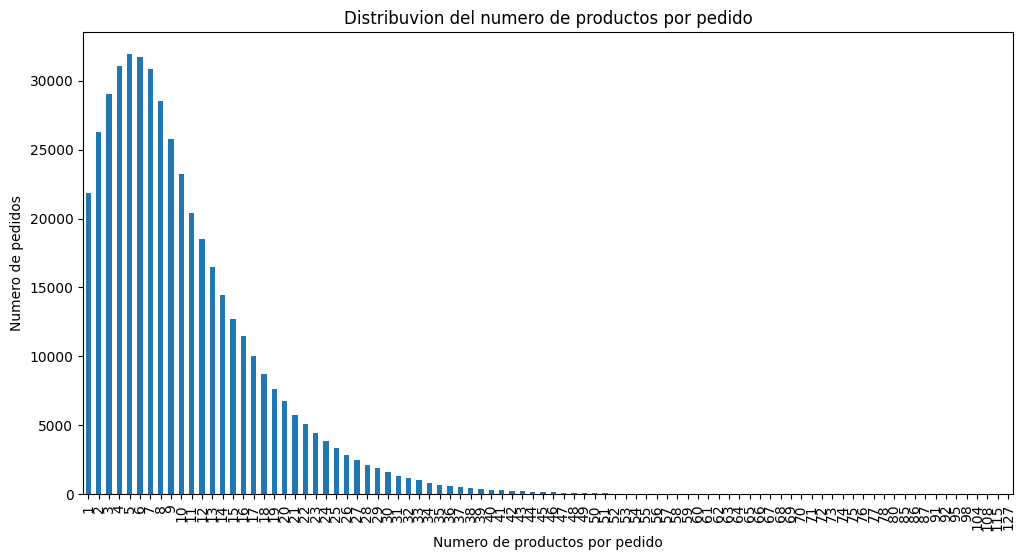

In [54]:
distribucion = productos_por_pedido.value_counts().sort_index()
print(distribucion.head(20))

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
distribucion.plot(kind='bar')
plt.title('Distribuvion del numero de productos por pedido')
plt.xlabel('Numero de productos por pedido')
plt.ylabel('Numero de pedidos')
plt.show()

En promedio - Las personas compran 10 productos por pedido.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [55]:
print("Primeras 5 filas de order_products:")
print(order_products.head())

Primeras 5 filas de order_products:
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1


In [56]:
productos_reordenados = order_products[order_products['reordered'] == 1]
print(f"Total de productos reordenados: {len(productos_reordenados)}")
print("Primeras 5 filas de productos reordenados:")
print(productos_reordenados.head())

Total de productos reordenados: 2683838
Primeras 5 filas de productos reordenados:
   order_id  product_id  add_to_cart_order  reordered
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1
5   2456893       21616                  4          1


In [57]:
conteo_reordenados = productos_reordenados['product_id'].value_counts()
print("Los 5 productos mas reordenados:")
print(conteo_reordenados.head())

Los 5 productos mas reordenados:
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
Name: product_id, dtype: int64


In [58]:
top_20_reordenados = conteo_reordenados.head(20).reset_index()
top_20_reordenados.columns = ['product_id', 'veces_reordenados']

top_20_con_nombres = top_20_reordenados.merge(products, on='product_id')
print("Los 20 productos mas reordenados:")
print(top_20_con_nombres[['product_id', 'product_name', 'veces_reordenados']])

Los 20 productos mas reordenados:
    product_id              product_name  veces_reordenados
0        24852                    Banana              55763
1        13176    Bag of Organic Bananas              44450
2        21137      Organic Strawberries              28639
3        21903      Organic Baby Spinach              26233
4        47209      Organic Hass Avocado              23629
5        47766           Organic Avocado              18743
6        27845        Organic Whole Milk              16251
7        47626               Large Lemon              15044
8        27966       Organic Raspberries              14748
9        16797              Strawberries              13945
10       26209                     Limes              13327
11       22935      Organic Yellow Onion              11145
12       24964            Organic Garlic              10411
13       45007          Organic Zucchini              10076
14       49683            Cucumber Kirby               9538
15    

Las bananas son las mas reordenadas.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [59]:
total_pedidos_por_producto = order_products['product_id'].value_counts()
print("Los 5 productos mas pedidos en tota:")
print(total_pedidos_por_producto.head())

Los 5 productos mas pedidos en tota:
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
Name: product_id, dtype: int64


In [60]:
tasa_reorden = (conteo_reordenados / total_pedidos_por_producto * 100).fillna(0)
print("Tasa de reorden de los 10 productos mas pedidos:")
top_10_productos = total_pedidos_por_producto.head(10)
for product_id in top_10_productos.index:
    tasa = tasa_reorden.get(product_id, 0)
    print(f"Producto {product_id}: {tasa:.2f}%")

Tasa de reorden de los 10 productos mas pedidos:
Producto 24852: 84.43%
Producto 13176: 83.40%
Producto 21137: 77.32%
Producto 21903: 77.22%
Producto 47209: 79.36%
Producto 47766: 75.92%
Producto 47626: 69.99%
Producto 16797: 69.66%
Producto 26209: 67.68%
Producto 27845: 82.91%


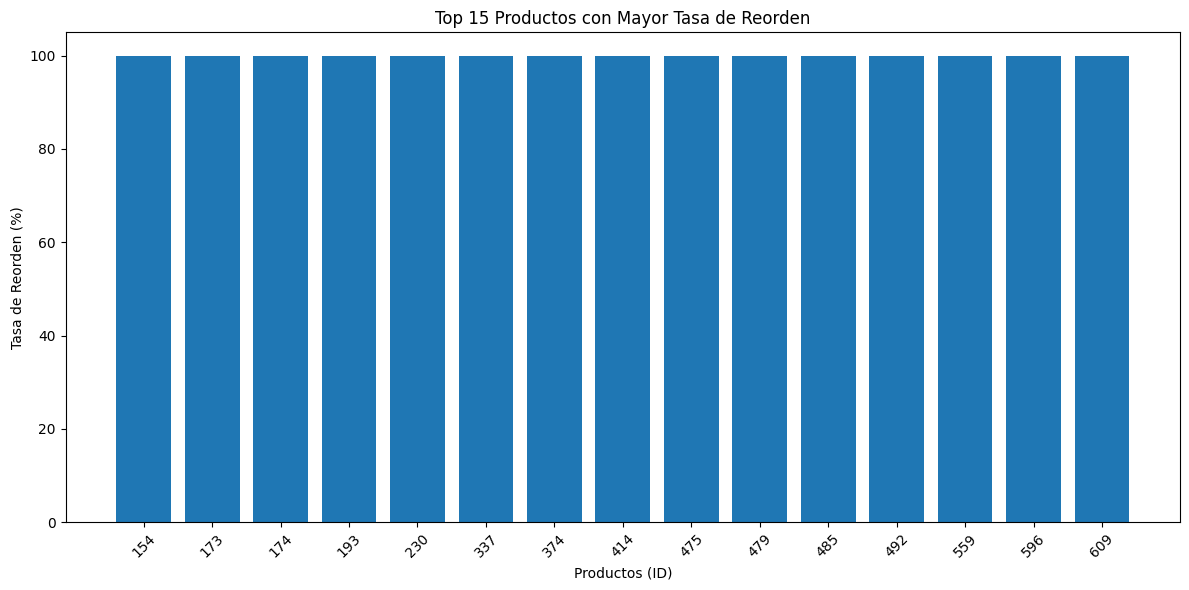

Productos con mayor tasa de reorden:
1. Producto 154: 100.00%
2. Producto 173: 100.00%
3. Producto 174: 100.00%
4. Producto 193: 100.00%
5. Producto 230: 100.00%
6. Producto 337: 100.00%
7. Producto 374: 100.00%
8. Producto 414: 100.00%
9. Producto 475: 100.00%
10. Producto 479: 100.00%
11. Producto 485: 100.00%
12. Producto 492: 100.00%
13. Producto 559: 100.00%
14. Producto 596: 100.00%
15. Producto 609: 100.00%


In [61]:
import matplotlib.pyplot as plt

top_15_reorden = tasa_reorden.nlargest(15)

plt.figure(figsize=(12, 6))
plt.bar(range(len(top_15_reorden)), top_15_reorden.values)
plt.title('Top 15 Productos con Mayor Tasa de Reorden')
plt.xlabel('Productos (ID)')
plt.ylabel('Tasa de Reorden (%)')
plt.xticks(range(len(top_15_reorden)), top_15_reorden.index, rotation=45)
plt.tight_layout()
plt.show()

print("Productos con mayor tasa de reorden:")
for i, (product_id, tasa) in enumerate(top_15_reorden.items()):
    print(f"{i+1}. Producto {product_id}: {tasa:.2f}%")
    

El producto 24852 es uno de los mas reordenados por los clientes.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [62]:
order_products_with_users = order_products.merge(orders, on='order_id')

         total_productos  productos_reordenados  proporcion_reordenados
user_id                                                                
2                     26                      1                0.038462
4                      2                      0                0.000000
5                     12                      8                0.666667
6                      4                      0                0.000000
7                     14                     13                0.928571
count    149626.000000
mean          0.494853
std           0.292685
min           0.000000
25%           0.272727
50%           0.500000
75%           0.724138
max           1.000000
Name: proporcion_reordenados, dtype: float64


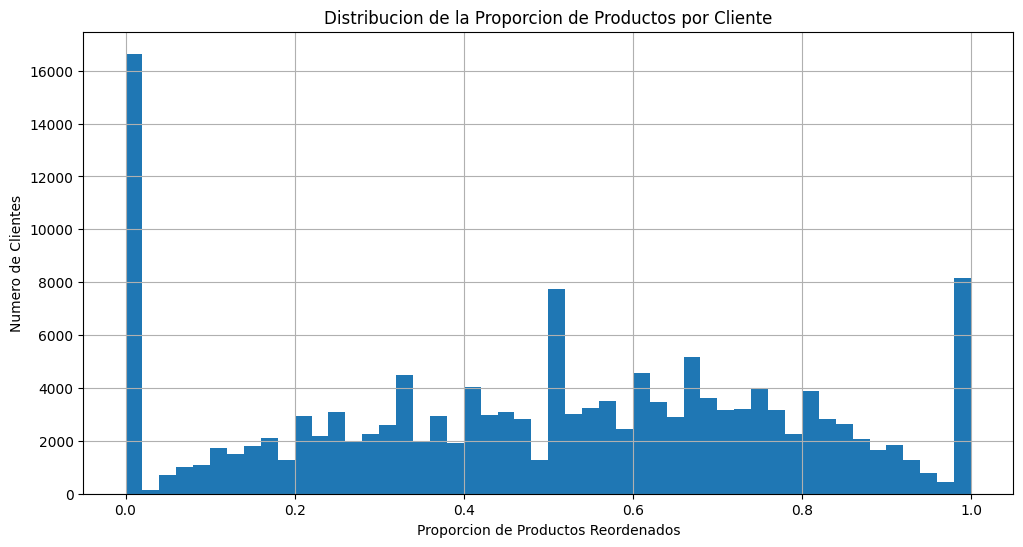

In [63]:
user_stats = order_products_with_users.groupby('user_id').agg({
    'product_id': 'count',
    'reordered': 'sum'
}).rename(columns={'product_id': 'total_productos', 'reordered': 'productos_reordenados'})

user_stats['proporcion_reordenados'] = user_stats['productos_reordenados'] / user_stats['total_productos']

print(user_stats.head())

print(user_stats['proporcion_reordenados'].describe())

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
user_stats['proporcion_reordenados'].hist(bins=50)
plt.title('Distribucion de la Proporcion de Productos por Cliente')
plt.xlabel('Proporcion de Productos Reordenados')
plt.ylabel('Numero de Clientes')
plt.show()

El user_id #7 es el que mas reordena productos.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [64]:
primeros_productos = order_products[order_products['add_to_cart_order'] == 1]
print(f"Total de productos añadidosprimero: {len(primeros_productos)}")
print("Primeras 5 filas:")
print(primeros_productos.head())

Total de productos añadidosprimero: 450046
Primeras 5 filas:
    order_id  product_id  add_to_cart_order  reordered
1     567889        1560                  1          1
2    2261212       26683                  1          1
14   1961225       37553                  1          1
16    639939       10017                  1          1
23    750040        8518                  1          0


In [65]:
conteo_primeros = primeros_productos['product_id'].value_counts()
print("Los 5 productos mas añadidos primero:")
print(conteo_primeros.head())

Los 5 productos mas añadidos primero:
24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
Name: product_id, dtype: int64


In [68]:
top_20_primeros = conteo_primeros.head(20).reset_index()
top_20_primeros.columns = ['product_id', 'veces_primero']

top_20_con_nombres = top_20_primeros.merge(products, on='product_id')

print("Los 20 primeros que mas veces se ponen primero en el carrito:")
print(top_20_con_nombres[['product_id', 'product_name', 'veces_primero']])

Los 20 primeros que mas veces se ponen primero en el carrito:
    product_id                 product_name  veces_primero
0        24852                       Banana          15562
1        13176       Bag of Organic Bananas          11026
2        27845           Organic Whole Milk           4363
3        21137         Organic Strawberries           3946
4        47209         Organic Hass Avocado           3390
5        21903         Organic Baby Spinach           3336
6        47766              Organic Avocado           3044
7        19660                 Spring Water           2336
8        16797                 Strawberries           2308
9        27966          Organic Raspberries           2024
10       44632   Sparkling Water Grapefruit           1914
11       49235          Organic Half & Half           1797
12       47626                  Large Lemon           1737
13         196                         Soda           1733
14       38689     Organic Reduced Fat Milk          

Los clientes tienden a reordenar bananas, es el producto mas comprado.

### Conclusion general del proyecto:

-Las horas pico de pedidos son entre las 10:00 AM y 4:00 PM.
-Los Lunes y los Domingos son los dias mas populares para hacer compras.
-Los Sabados tienden a tener mas actividad que los Miercoles.
-La mayoria de clientes hacen solo 1 pedido.
-El 50% de los productos que compran los clientes son reordenados.
-Las bananas son las mas reordenados y lo mas popular.